In [2]:
#Importing our basic packages
import __future__
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

In [3]:
#Importing keras and its specifics 
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Conv1D,Flatten,MaxPooling1D,LSTM
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

In [4]:
startDate = datetime.datetime(1994,4,1)
endDate = datetime.datetime(2020,6,30)

In [5]:
#We use the pandas_datareader package to get the data directly from Yahoo Finance
#the __future__ package allows us to keep using pdr even though it's deprecated
data = pdr.get_data_yahoo("^BVSP", start= startDate, end =endDate)
data.drop("Adj Close",axis=1,inplace=True)
data.to_csv("BVSP.csv")

df = pd.read_csv("BVSP.csv")
df = df.drop("Adj Close",axis=1,inplace=True)

KeyError: "['Adj Close'] not found in axis"

## seeing what we're working with

In [6]:
data.head(10)
#We see our data skipping some days, and that's due to weekends

,High,Low,Open,Close,Volume
Date,,,,,
1994-04-04,1515.599976,1355.000000,1515.599976,1355.000000,0.0
1994-04-05,1445.300049,1354.800049,1355.000000,1428.000000,0.0
1994-04-06,1485.800049,1413.400024,1428.000000,1435.500000,0.0
1994-04-07,1477.699951,1423.699951,1435.500000,1474.900024,0.0
1994-04-08,1566.800049,1474.900024,1474.900024,1537.400024,0.0
1994-04-11,1661.099976,1537.400024,1537.400024,1659.599976,0.0
1994-04-12,1686.000000,1647.900024,1659.599976,1648.900024,0.0
1994-04-13,1678.199951,1550.699951,1648.900024,1552.699951,0.0
1994-04-14,1564.800049,1473.699951,1552.699951,1506.199951,0.0


In [7]:
df.index=pd.to_datetime(df["Date"])
df=df.drop("Date",axis=1)

In [8]:
data.tail(10)

,High,Low,Open,Close,Volume
Date,,,,,
2020-06-17,96611.0,93531.0,93531.0,95547.0,11134700.0
2020-06-18,97110.0,94698.0,95547.0,96125.0,10008500.0
2020-06-19,97540.0,95874.0,96138.0,96572.0,13134400.0
2020-06-22,96870.0,94869.0,96572.0,95336.0,8264700.0
2020-06-23,97486.0,95344.0,95344.0,95975.0,9752700.0
2020-06-24,95974.0,93259.0,95974.0,94377.0,9962700.0
2020-06-25,96260.0,94152.0,94382.0,95983.0,8697900.0
2020-06-26,95979.0,93514.0,95979.0,93834.0,8439100.0
2020-06-29,95735.0,93825.0,93837.0,95735.0,8906800.0


In [9]:
#We use the resample function change our intervals to be monthly

dfMonthly= df.resample("M").mean()

In [10]:
#Removing the last month of the dataframe
dfMonthly = dfMonthly[:-1]

In [21]:
dfm = dfMonthly

In [11]:
dfMonthly.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2020-01-31,117723.454545,115874.681818,116988.727273,116904.000000,5.548236e+06
2020-02-29,114782.294118,112578.000000,113746.294118,113650.529412,6.642041e+06
2020-03-31,85664.454545,78462.454545,82932.954545,81521.090909,1.229659e+07
2020-04-30,79195.700000,75758.450000,77215.150000,77588.750000,1.047590e+07
2020-05-31,82479.300000,80254.400000,81108.450000,81447.750000,1.101780e+07


In [12]:
startYear = startDate.year
startMonth = startDate.month
endYear = endDate.year
endMonth = endDate.month

In [13]:
startYear, startMonth, endYear, endMonth

(1994, 4, 2020, 6)

In [14]:
initialDays = []

In [15]:
# First year
for month in range(startMonth,13):
    initialDays.append(min(data[str(startYear)+"-"+str(month)].index))
# Other years
for year in range(startYear+1,endYear):
    for month in range(1,13):
        initialDays.append(min(data[str(year)+"-"+str(month)].index))
# Last year
for month in range(1,endMonth+1):
    initialDays.append(min(data[str(endYear)+"-"+str(month)].index))

In [16]:
initialDays

[Timestamp('1994-04-04 00:00:00'),
 Timestamp('1994-05-02 00:00:00'),
 Timestamp('1994-06-01 00:00:00'),
 Timestamp('1994-07-04 00:00:00'),
 Timestamp('1994-08-01 00:00:00'),
 Timestamp('1994-09-01 00:00:00'),
 Timestamp('1994-10-04 00:00:00'),
 Timestamp('1994-11-01 00:00:00'),
 Timestamp('1994-12-01 00:00:00'),
 Timestamp('1995-01-02 00:00:00'),
 Timestamp('1995-02-01 00:00:00'),
 Timestamp('1995-03-02 00:00:00'),
 Timestamp('1995-04-03 00:00:00'),
 Timestamp('1995-05-02 00:00:00'),
 Timestamp('1995-06-01 00:00:00'),
 Timestamp('1995-07-03 00:00:00'),
 Timestamp('1995-08-01 00:00:00'),
 Timestamp('1995-09-01 00:00:00'),
 Timestamp('1995-10-02 00:00:00'),
 Timestamp('1995-11-01 00:00:00'),
 Timestamp('1995-12-01 00:00:00'),
 Timestamp('1996-01-02 00:00:00'),
 Timestamp('1996-02-01 00:00:00'),
 Timestamp('1996-03-01 00:00:00'),
 Timestamp('1996-04-01 00:00:00'),
 Timestamp('1996-05-02 00:00:00'),
 Timestamp('1996-06-03 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1996-08-

In [20]:
dfMonthly["fd_cm"]=initialDays[:-1]
dfMonthly["fd_nm"]=initialDays[1:]
dfMonthly["fd_cm_open"]=np.array(df.loc[initialDays[:-1],"Open"])
dfMonthly["fd_nm_open"]=np.array(df.loc[initialDays[1:],"Open"])
dfMonthly["rapp"]=dfMonthly["fd_nm_open"].divide(dfMonthly["fd_cm_open"])

In [22]:
dfm["mv_avg_12"]= dfm["Open"].rolling(window=12).mean().shift(1)
dfm["mv_avg_24"]= dfm["Open"].rolling(window=24).mean().shift(1)

In [23]:
print(dfm.loc["1995-03":"1996-02","Open"].mean())

4127.772936592776


In [24]:
dfm=dfm.iloc[24:,:]
print(dfm.index)

DatetimeIndex(['1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31',
               '1996-08-31', '1996-09-30', '1996-10-31', '1996-11-30',
               '1996-12-31', '1997-01-31',
               ...
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31'],
              dtype='datetime64[ns]', name='Date', length=290, freq='M')


In [25]:
mtest=72
train=dfm.iloc[:-mtest,:] 
test=dfm.iloc[-mtest:,:] 

In [26]:
def yield_gross(df,v):
    prod=(v*df["rapp"]+1-v).prod()
    n_years=len(v)/12
    return (prod-1)*100,((prod**(1/n_years))-1)*100

In [28]:
tax_cg=0.15
comm_bk=0.0025

In [29]:
def expand_islands2D(v):
    
    # Get start, stop of 1s islands
    v1 = np.r_[0,v,0]
    idx = np.flatnonzero(v1[:-1] != v1[1:])
    s0,s1 = idx[::2],idx[1::2]
    if len(s0)==0:
        return np.zeros(len(v)),0
    
    # Initialize 1D id array  of size same as expected o/p and has 
    # starts and stops assigned as 1s and -1s, so that a final cumsum
    # gives us the desired o/p
    N,M = len(s0),len(v)
    out = np.zeros(N*M,dtype=int)

    # Setup starts with 1s
    r = np.arange(N)*M
    out[s0+r] = 1


    # Setup stops with -1s
    if s1[-1] == M:
        out[s1[:-1]+r[:-1]] = -1
    else:
        out[s1+r] -= 1

    # Final cumsum on ID array
    out2D = out.cumsum().reshape(N,-1)
    return out2D,N

In [30]:
def yield_net(df,v):
    n_years=len(v)/12
    
    w,n=expand_islands2D(v)
    A=(w*np.array(df["rapp"])+(1-w)).prod(axis=1)  # A is the product of each island of ones of 1 for df["rapp"]
    A1p=np.maximum(0,np.sign(A-1)) # vector of ones where the corresponding element if  A  is > 1, other are 0
    Ap=A*A1p # vector of elements of A > 1, other are 0
    Am=A-Ap # vector of elements of A <= 1, other are 0
    An=Am+(Ap-A1p)*(1-tax_cg)+A1p
    prod=An.prod()*((1-comm_bk)**(2*n)) 
    
    return (prod-1)*100,((prod**(1/n_years))-1)*100   


In [31]:
def create_window(data, window_size = 1):    
    data_s = data.copy()
    for i in range(window_size):
        data = pd.concat([data, data_s.shift(-(i + 1))], axis = 1)
        
    data.dropna(axis=0, inplace=True)
    return(data)


In [32]:


scaler=MinMaxScaler(feature_range=(0,1))
dg=pd.DataFrame(scaler.fit_transform(dfm[["High","Low","Open","Close","Volume","fd_cm_open",\
                                          "mv_avg_12","mv_avg_24","fd_nm_open"]].values))
dg0=dg[[0,1,2,3,4,5,6,7]]


window=4
dfw=create_window(dg0,window)

X_dfw=np.reshape(dfw.values,(dfw.shape[0],window+1,8))
print(X_dfw.shape)
print(dfw.iloc[:4,:])
print(X_dfw[0,:,:])

y_dfw=np.array(dg[8][window:])



(286, 5, 8)
          0         1         2         3    4         5         6         7  \
0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
1  0.004214  0.004033  0.004241  0.004160  0.0  0.001529  0.001477  0.001644   
2  0.007096  0.006659  0.007096  0.006898  0.0  0.006358  0.002781  0.003357   
3  0.011773  0.010880  0.011790  0.011218  0.0  0.009234  0.004543  0.004644   

          0         1  ...         6         7         0         1         2  \
0  0.004214  0.004033  ...  0.004543  0.004644  0.011228  0.010910  0.011302   
1  0.007096  0.006659  ...  0.006626  0.005767  0.012634  0.012793  0.012678   
2  0.011773  0.010880  ...  0.008358  0.006468  0.014397  0.014393  0.014315   
3  0.011228  0.010910  ...  0.009885  0.007003  0.014273  0.014416  0.014277   

          3    4         5         6         7  
0  0.011017  0.0  0.011623  0.006626  0.005767  
1  0.012670  0.0  0.011269  0.008358  0.006468  
2  0.014391  0.0  0.012876  0.009885  0

In [33]:
X_trainw=X_dfw[:-mtest-1,:,:]
X_testw=X_dfw[-mtest-1:,:,:]
y_trainw=y_dfw[:-mtest-1]
y_testw=y_dfw[-mtest-1:]

In [34]:


def model_lstm(window,features):
    
    model=Sequential()
    model.add(LSTM(300, input_shape = (window,features), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(200, input_shape=(window,features), return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(100,kernel_initializer='uniform',activation='relu'))        
    model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
    model.compile(loss='mse',optimizer='adam')
    
    
    return model



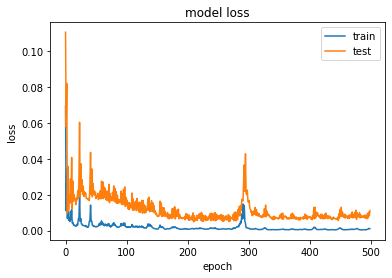

In [35]:
model=model_lstm(window+1,8)
history=model.fit(X_trainw,y_trainw,epochs=500, batch_size=24, validation_data=(X_testw, y_testw), \
                  verbose=0, callbacks=[],shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [36]:


y_pr=model.predict(X_trainw)



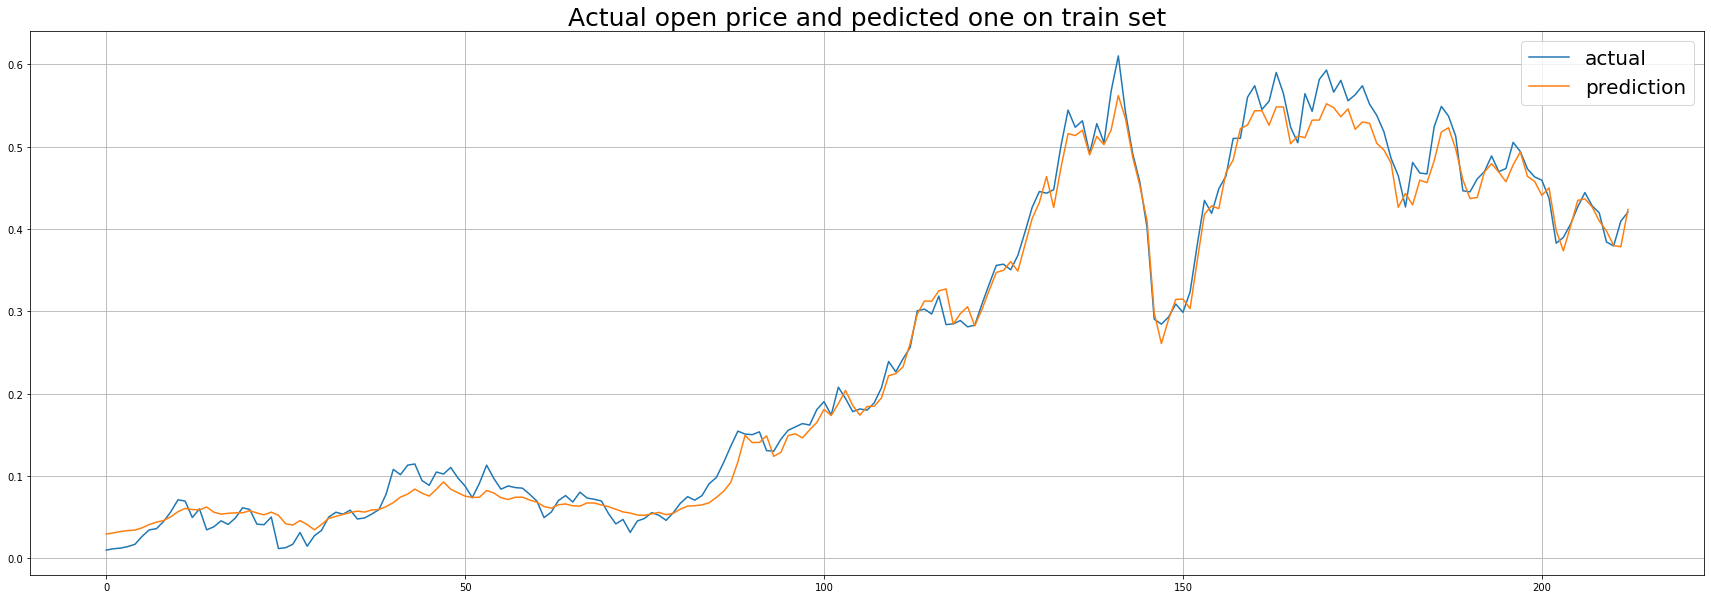

In [37]:
plt.figure(figsize=(30,10))
plt.plot(y_trainw, label="actual")
plt.plot(y_pr, label="prediction")
plt.legend(fontsize=20)
plt.grid(axis="both")
plt.title("Actual open price and pedicted one on train set",fontsize=25)
plt.show()


In [38]:
y_pred=model.predict(X_testw)


In [39]:


v=np.diff(y_pred.reshape(y_pred.shape[0]),1)
v_lstm=np.maximum(np.sign(v),0)



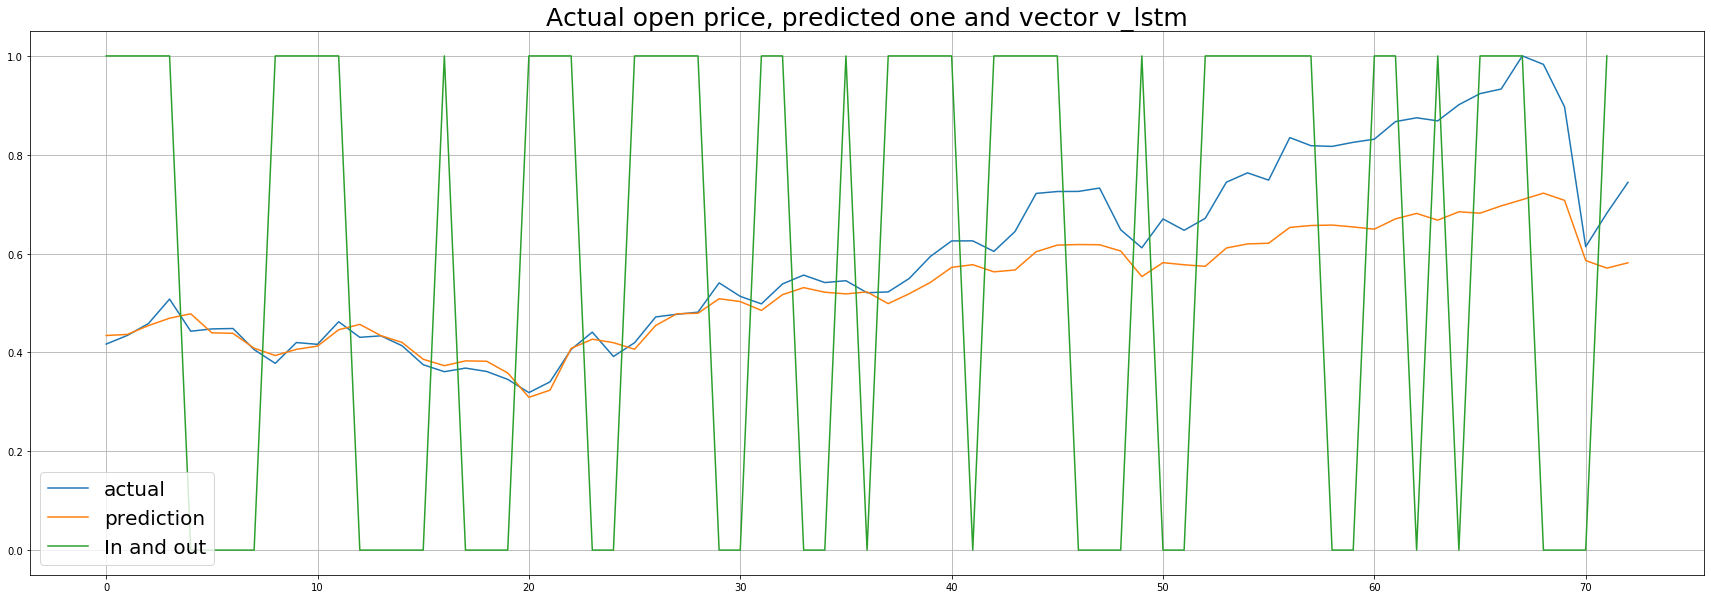

In [40]:
plt.figure(figsize=(30,10))
plt.plot(y_testw, label="actual")
plt.plot(y_pred, label="prediction")
plt.plot(v_lstm,label="In and out")
plt.legend(fontsize=20)
plt.grid(axis="both")
plt.title("Actual open price, predicted one and vector v_lstm",fontsize=25)
plt.show()


In [41]:


v_bh=np.ones(test.shape[0])
v_ma=test["fd_cm_open"]>test["mv_avg_12"]



In [42]:


def gross_portfolio(df,w):
    portfolio=[ (w*df["rapp"]+(1-w))[:i].prod() for i in range(len(w))]
    return portfolio



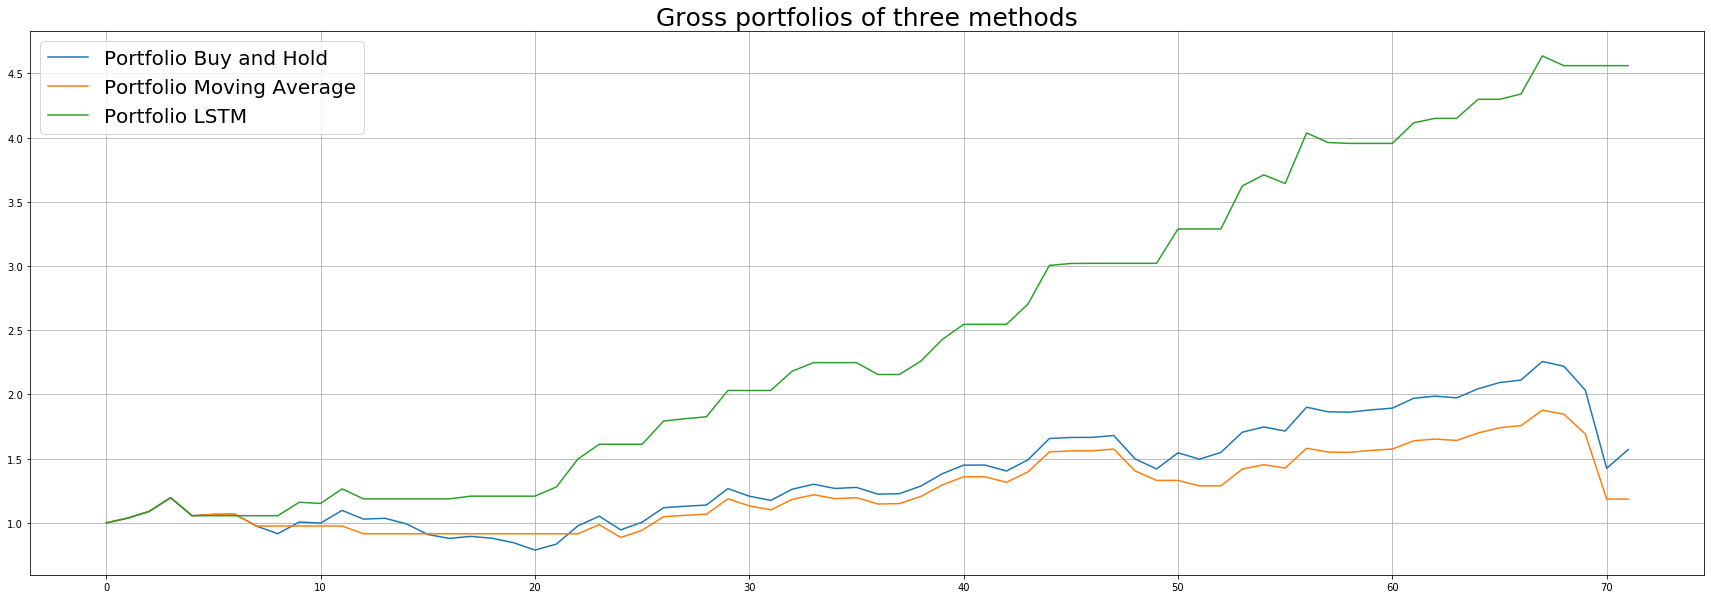

In [43]:
plt.figure(figsize=(30,10))
plt.plot(gross_portfolio(test,v_bh),label="Portfolio Buy and Hold")
plt.plot(gross_portfolio(test,v_ma),label="Portfolio Moving Average")
plt.plot(gross_portfolio(test,v_lstm),label="Portfolio LSTM")
plt.legend(fontsize=20)
plt.grid(axis="both")
plt.title("Gross portfolios of three methods", fontsize=25)
plt.show()
